<a href="https://colab.research.google.com/github/thomas211738/KTP_Activities/blob/main/ek381lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ENG EK381: Probability, Statistics, and Data Science for Engineers  <br> Lab 1: Getting Started with Python and Jupyter Notebook

### This lab was completed by [Kylie Sieradzki].

(double click on this "cell" (box) to edit the above, then delete this helper sentence).

Welcome to EK381's new set of labs! The goal is to give you hands-on experience with **exploratory data analysis**, which is a useful skill set for many disciplines. Unlike in previous semesters, we are not asking you to write programs yourself and you will not be asked to turn in your code. Instead, the provided Jupyter notebook will demonstrate how to use a data analysis technique using a couple of lines of Python code. Your task will be to apply these basic functions to analyze and plot the data. There will be clearly marked places for you to perform data analysis, generate plots, and write comments. At the end, you will submit your completed notebook for grading. Exams (and possibly quizzes) will include questions meant to test your understanding of data analysis concepts, such as interpreting plots.

In this first lab, you have three objectives:
1. Install/setup a version of Jupyter notebook that you will be comfortable using throughout the semester. (If you are reading this Jupyter notebook, this step should have already been completed.) You can always switch or upgrade to an another version later.
2. Download and read in a comma-separated value (CSV) dataset.
3. Run the fully-written data analysis below, answering the three questions (L1.1, L1.2, and L1.3), and upload the completed Jupyter notebook for grading.

Each of the rectangles that you see below is called a *cell*. To run the code in a cell (and make the results available to other cells), you can press the "play" button (triangle) or press "Shift + Enter."

If you are using JupyterLab Desktop, you will need to install seaborn. Uncomment and run the cell below.

In [1]:
# JupyterLab Desktop (not Anaconda) users, delete the # symbol from the last two lines of this cell
# and then run the cell to install the seaborn and sklearn packages (which is pre-installed on Anaconda
# and Google Colab).

!pip install seaborn
!pip install scikit-learn

Run the cell below to import the libraries/packages you will need to complete this lab. (If you are not able to run it successfully, please get help from a GST during a discussion before the lab is due.)

In [6]:
# Import necessary packages.
# This cell must be run in order for the packages to be available below.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Next, we are going to read in the CSV file that contains our dataset. If you are working in Google colab, uncomment the code in the cell below and run it. For any other environments, skip the next cell.

In [11]:
# Google colab users, delete the # symbols from the two lines below and then run this cell to mount your Google drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download the dataset `penguins.csv` from the Lab 1 folder on Blackboard Learn and move it to the directory you will be using for this lab. You might want to create a new subfolder `datasets` to contain all the datasets for this course. When you are asked to do something in a lab (that will be graded), it will be written as LX.Y where X is the lab number and Y is the problem number. Your first lab problem is below.

---
#### L1.1 Determine the path to `penguins.csv` and set the variable `penguins_path` below to be equal to the resulting string.
---
There are a few options for this, ask for help from a TA if you are stuck:
- Same Folder: If you will keep your datasets in the same folder as your Jupyter notebook, then the path is simply the filename `penguins.csv`
- Subfolder: If you will keep your datasets in a subfolder inside the folder containing your Jupyter notebook, then you use the local filepath. For example, if the subdirectory is called `datasets`, then the local path would be `datasets/penguins.csv`
- Some other folder: In this case, the easiest thing to do is to use the full path by first navigating to the file and then
    - Google colab: Click on the three vertical dots to the right of the file name and select `Copy Path`
    - Mac: Right click on the file, then press and hold option. Select `Copy "penguins.csv" as Pathname`
    - Windows: Hold shift, right click on the file, and select `Copy as Path`
      
Once you have filled in `penguins_path`, run the cell below.

In [18]:
penguins_path = "/penguins (1).csv" # Put your copied filepath to penguins.csv inside the quotes to the left.
penguins = pd.read_csv(penguins_path)

Let's take a quick look at the dataset, which we have loaded as a pandas dataframe. If you simply write the name of the dataframe, you will see a snapshot of the data. Run the cell below to do this. You will see that this is a dataset of 344 penguins, including their species, bill length, bill depth, and mass. Note also that, in Python, indexing starts at 0, not 1.

In [19]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


What if we want to see all of the rows?

In [20]:
pd.set_option("display.max_rows", None)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In previous semesters, our focus was on writing algorithms to implement some of the concepts we learned in class. For example, an important quantity is the average or mean of a variable. We used to write a for loop to sum up all the values, and then divide it by the total number of values. This semester, we will just use built-in functions to quickly compute many statistics, including the mean, standard deviation, minimum, and maximum. Run the cell below to see.

In [21]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


---
#### L1.2 What is the body mass (in grams) of the lightest penguin in the dataset?

#### Answer: 2700
---
You can write comments directly in the Jupyter notebook using "Markdown" cells, like the one below. (You change the cell type from Code to Markdown and back using the menu or keyboard shortcuts.) Running a Markdown cell will display the text.

<Axes: xlabel='bill_length_mm', ylabel='Count'>

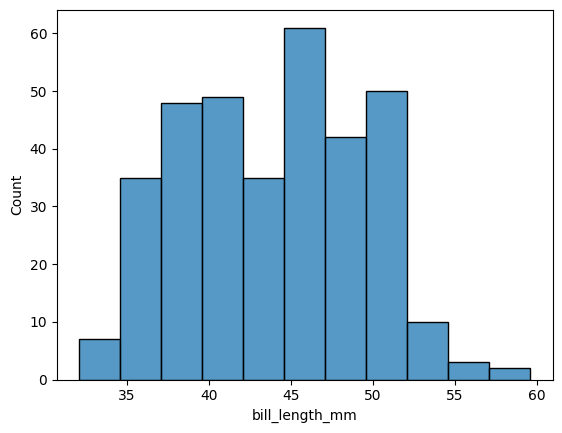

In [22]:
sns.histplot(data=penguins, x="bill_length_mm")

In EK381, we will be primarily interested in probability distributions, rather than raw counts. If we divide the counts by the total number of entries in the dataset, we get normalized counts. These normalized counts (or frequencies) can be directly used as an estimate of the "true" probability distribution. Alternatively, we can fit a distribution to our data. We will explore both ideas throughout the semester. Run the cell below to see an example.

<Axes: xlabel='bill_length_mm', ylabel='Probability'>

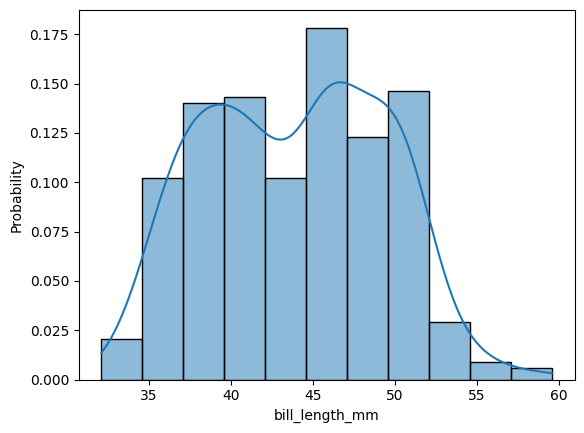

In [23]:
sns.histplot(data=penguins, x="bill_length_mm", stat = "probability", kde = True)

Does the distribution of bill lengths change based on the penguin species? We can visualize this easily by plotting a different histogram for each species as done below. Starting in Lecture 2, we will understand this as a form of "conditioning."

<Axes: xlabel='bill_length_mm', ylabel='Probability'>

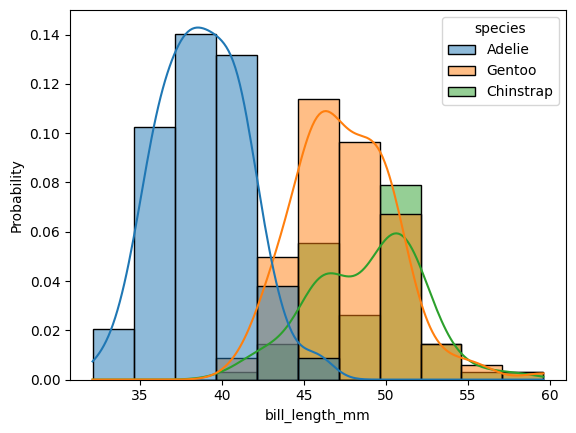

In [24]:
sns.histplot(data=penguins, x="bill_length_mm", stat = "probability", hue = "species", kde = True)

We can also look at two variables at once, which will be important starting in Chapter 4. The scatter plot below places a dot at coordinates (x,y) for each penguin where x corresponds to the bill length, y to the bill depth, and the color to the species. We have also included the fitted distributions for the individual variables, but you will more often just see a simple scatter plot.

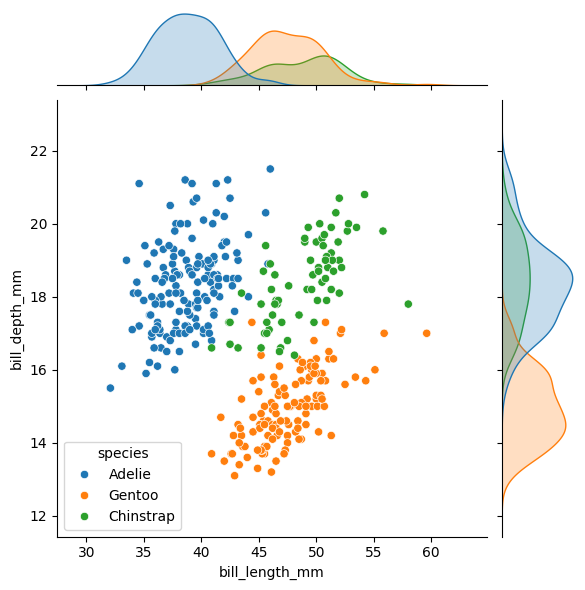

In [25]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

Above, we calculated some interesting statistics, such as the mean and standard deviation. We can visualize these using bar plots, with the height corresponding to the mean and the "error bar" (black line) corresponding to the standard deviation. Again, we will encounter these ideas later in the semester.

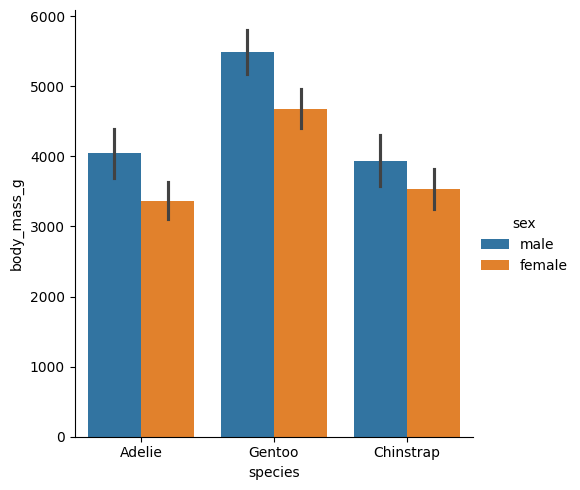

In [26]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex", errorbar="sd"
)

Everything we have done so far is descriptive. What about using some values to predict others? Below, we fit a line to predict the bill depth from the bill length. We will explore estimation and prediction more starting in Chapter 7.

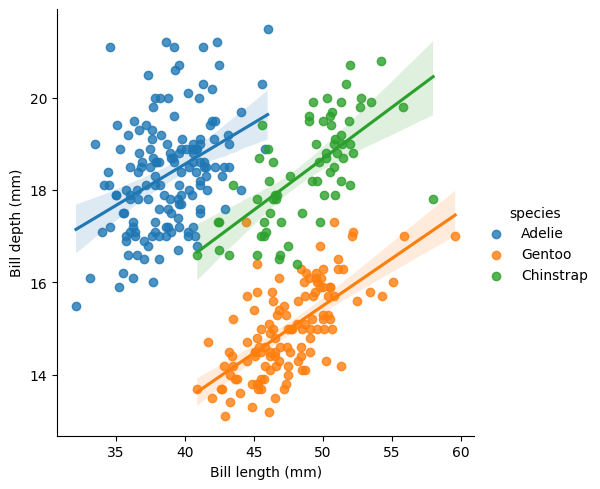

In [27]:
# Plot bill depth as a function of bill length for each species
g = sns.lmplot(data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species")

# Use more informative axis labels than are provided by default
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)")

Another interesting possibility is to use the feature data for classification. Specifically, how well can we classify penguin species using only the bill depth and bill length? The code below displays one possible set of classification regions that work correctly for most of the penguins. Penguins that are misclassified by these regions are circled in red. The code also computes and outputs the percentage of misclassified penguins. We learn more about these machine learning techniques in Chapter 10.

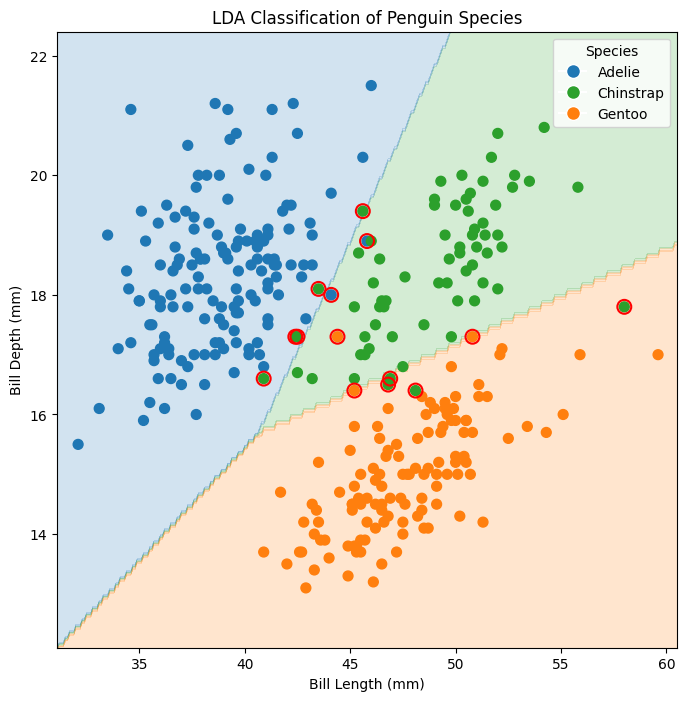

Percentage of data misclassified by these decision boundaries: 4.20%


In [28]:
penguins_data = penguins.dropna()  # Drop rows with missing values

# Extract features and target
X = penguins_data[['bill_length_mm', 'bill_depth_mm']].values
species_names = penguins_data['species'].astype('category').cat.categories
y = penguins_data['species'].astype('category').cat.codes

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Calculate training error
predictions = lda.predict(X)
train_error = 1 - accuracy_score(y, predictions)

# Visualization of classification regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
custom_palette = ['#1f77b4', '#2ca02c','#ff7f0e']  # Blue, Orange, Green
colormap = ListedColormap(custom_palette)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=colormap)

# Plot training points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap, s=50)

# Highlight misclassified points
misclassified = X[predictions != y]
plt.scatter(misclassified[:, 0], misclassified[:, 1], facecolors='none', edgecolors='red', s=100, linewidths=1.5, label='Misclassified')

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=name,
                                markerfacecolor=color, markersize=10)
                     for name, color in zip(species_names, custom_palette)], title="Species")

plt.title("LDA Classification of Penguin Species")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

print(f"Percentage of data misclassified by these decision boundaries: {train_error:.2%}")


Finally, another important issue we will examine throughout the labs are the limitations of statistics. For example, while a linear fit seems like a good estimator above, it is not always. The dataset below is known as Anscombe's quartet. Each set of 11 points generates the same linear fit. This seems like a good fit in dataset I where as a curve would do better in dataset II. A line would be a good fit in datasets III and IV, but a single "outlier" has tricked our simple line fitting algorithm.

**Visualizing data is an important way to avoid these issues, and one of our goals throughout the semester is to provide you with tools and intuition to avoid statistical fallacies.**

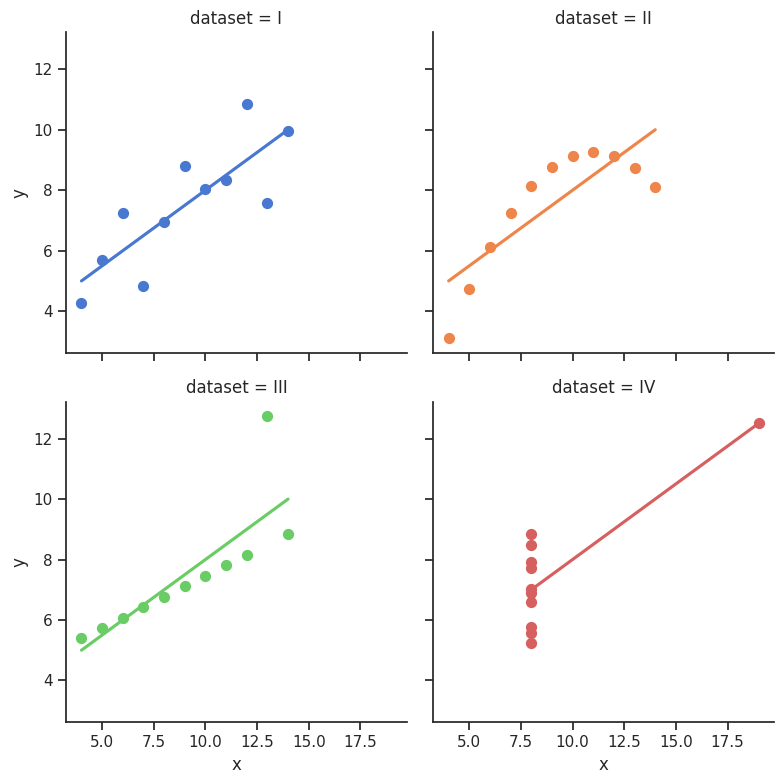

In [29]:
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

---
#### L1.3 Please describe, in your own words, an engineering application from your major where some of the techniques showcased above might be useful. Briefly explain why.

#### Answer: As a BME the prior techniques may be useful in research concerning patients or diseases where you are testing or examining a disease or its symptoms for a set of patients.
---

That's it for the first lab. After you have successfully filled in and run all of the cells above, please upload your completed Jupyter notebook (ek381lab1.ipynb) to Gradescope for grading.

There are many, many resources online for learning Python, Jupyter notebook, and exploratory data analysis. You can find a few options on the course website, please let us know if you find other particularly good resources that we failed to mention. The sample plots generated above were taken in part from the seaborn tutorial here https://seaborn.pydata.org/index.html